## NYJobPostings  Analysis

## Data Loading, Exploration  and Pre-Processing



- Given dataset has __28 job posting related attributes of 3020 records__
- Below is the column with their definitions

| Column Name                        | Description                                               
| -------------                      | --------------                                             
| Job ID                             |  Job ID
| Agency	                         |  Agency to which this job posting belong to
| Posting Type	                     |  Job Poisiton Type
| No Of Positions	                 |  No of posting
| Business Title	                 |  Job Designation
| Civil Service Title	             |  Civil Service Title
| Title Code No	Level	             |  Job title code number and level
| Job Category	                     |  Job Category
| Full-Time/Part-Time indicator      |  Job type if it is fulltime or part time postion
| Salary Range From                  |  Salary starting range                                           
| Salary Range To                    |  Salary end Range                                                 
| Salary Frequency                   |  Salary frequncy                                           
| Work Location                      |  Primary worklocation                                                  
| Division/Work Unit                 |  Business unit this job belongs to                                       
| Job Description                    |  Job decription                                                
| Minimum Qual Requirements          |  Minimum educational qualification required                                         
| Preferred Skills                   |  Primay skilset required for this job                                                   
| Additional Information             |  Other information                                                
| To Apply                           |  Hemoglobin                                                
| Hours/Shift                        |  Working hours or shift                                       
| Work Location 1                    |  Work location                                  
| Recruitment Contact                |  Recruitment contact number                                      
| Residency Requirement              |  Residency Requirement                                              
| Posting Date                       |  Job posted date                                         
| Post Until                         |  Job expiary date                                   
| Posting Updated                    |  Job Posting updated date                                                 
| Process Date                       |  Job Processing Date                                               


### Import necessary packages

In [21]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pylab as plt
import seaborn as sb

### Load Data

In [23]:
jobpostingsdata_ny_df = pd.read_csv('Dataset/jobs.csv',index_col='Posting Date', parse_dates=['Posting Date'])
jobpostingsdata_ny_df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Post Until,Posting Updated,Process Date
Posting Date,,,,,,,,,,,,,,,,,,,,,
2011-06-24,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,NaN,2011-06-24T00:00:00.000,2019-11-26T00:00:00.000
2012-01-26,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,NaN,2012-01-26T00:00:00.000,2019-11-26T00:00:00.000
2013-10-24,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
2013-10-24,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
2014-01-09,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,NaN,2014-01-08T00:00:00.000,2019-11-26T00:00:00.000


### Data Preporcessing

<a id=section204></a>
#### Redifing Columns


In [24]:
jobpostingsdata_ny_df.columns = ['Job_ID','Agency','Posting_Type','#_Of_Positions','Business_Title','Civil_Service_Title','Title_Code_No',
                                'Level','Job_Category','Full-Time/Part-Time_indicator','Salary_Range_From','Salary_Range_To',
                                 'Salary_Frequency','Work_Location','Division/Work_Unit','Job_Description','Minimum_Qual_Requirements'
                                 ,'Preferred_Skills','Additional_Information','To_Apply','Hours/Shift','Work_Location_1',
                                'Recruitment_Contact','Residency_Requirement','Posting_Date','Post_Until','Posting_Updated']

### Data Prepration

In [25]:
jobpostingsdata_ny_df.shape

(3020, 27)

__Remove the simple features which are not really required for the analysis__

In [26]:
# 1st remove the simple features which are not really required for the analysis
jobpostingsdata_ny_df.drop("To_Apply", axis=1, inplace=True)
jobpostingsdata_ny_df.drop("Additional_Information", axis=1, inplace=True)
jobpostingsdata_ny_df.drop("Posting_Updated", axis=1, inplace=True)

__verify above features has been dropped or not__

In [27]:
jobpostingsdata_ny_df.columns

Index(['Job_ID', 'Agency', 'Posting_Type', '#_Of_Positions', 'Business_Title',
       'Civil_Service_Title', 'Title_Code_No', 'Level', 'Job_Category',
       'Full-Time/Part-Time_indicator', 'Salary_Range_From', 'Salary_Range_To',
       'Salary_Frequency', 'Work_Location', 'Division/Work_Unit',
       'Job_Description', 'Minimum_Qual_Requirements', 'Preferred_Skills',
       'Hours/Shift', 'Work_Location_1', 'Recruitment_Contact',
       'Residency_Requirement', 'Posting_Date', 'Post_Until'],
      dtype='object')

### Check for null values

In [28]:
# Check for null values
jobpostingsdata_ny_df.isnull().values.any()

True

In [29]:
# Check for null values in each feature
jobpostingsdata_ny_df.isnull().sum() 

Job_ID                              0
Agency                              0
Posting_Type                        0
#_Of_Positions                      0
Business_Title                      0
Civil_Service_Title                 0
Title_Code_No                       0
Level                               0
Job_Category                        2
Full-Time/Part-Time_indicator     209
Salary_Range_From                   0
Salary_Range_To                     0
Salary_Frequency                    0
Work_Location                       0
Division/Work_Unit                  0
Job_Description                     0
Minimum_Qual_Requirements          16
Preferred_Skills                  439
Hours/Shift                      2097
Work_Location_1                  1598
Recruitment_Contact              3020
Residency_Requirement               2
Posting_Date                     2048
Post_Until                          2
dtype: int64

## Data Visualization

### Various Plots


### Plotting Pie Plots 

__Prepare popular Job Categories list__ 

In [30]:
import plotly.offline as py

In [31]:
def pie_plot(labels, values, colors, title):
    fig = {
      "data": [
        {
          "values": values,
          "labels": labels,
          "domain": {"x": [0, .48]},
          "name": "Job Type",
          "sort": False,
          "marker": {'colors': colors},
          "textinfo":"percent+label",
          "textfont": {'color': '#FFFFFF', 'size': 10},
          "hole": .6,
          "type": "pie"
        } ],
        "layout": {
            "title":title,
            "annotations": [
                {
                    "font": {
                        "size": 25,

                    },
                    "showarrow": False,
                    "text": ""

                }
            ]
        }
    }
    return fig

In [32]:
jobpostingsdata_ny_df['Salary_Frequency'].fillna("Unknown", inplace=True)
value_counts = jobpostingsdata_ny_df['Salary_Frequency'].value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts, ['#7F308D', '#10A009', '#0969BC'], "Salary_Options"))

In [33]:
jobpostingsdata_ny_df['Full-Time/Part-Time_indicator'].fillna("Unknown", inplace=True)
value_counts = jobpostingsdata_ny_df['Full-Time/Part-Time_indicator'].value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts, ['#1B9E77', '#D95F02', '#7570B3'], "Job Types"))

In [34]:
def utility_categories_read(x):
    l = x.replace('&', ',').split(',')
    l = [x.strip().rstrip(',') for x in l]
    key_categories.extend(l)

key_categories = []
jobpostingsdata_ny_df['Job_Category'].dropna().apply(utility_categories_read)
key_categories = pd.Series(key_categories)
key_categories = key_categories[key_categories!='']
popular_categories = key_categories.value_counts().iloc[:25]

__The Opportunities also grows with job, but there is a small drop in 2019__

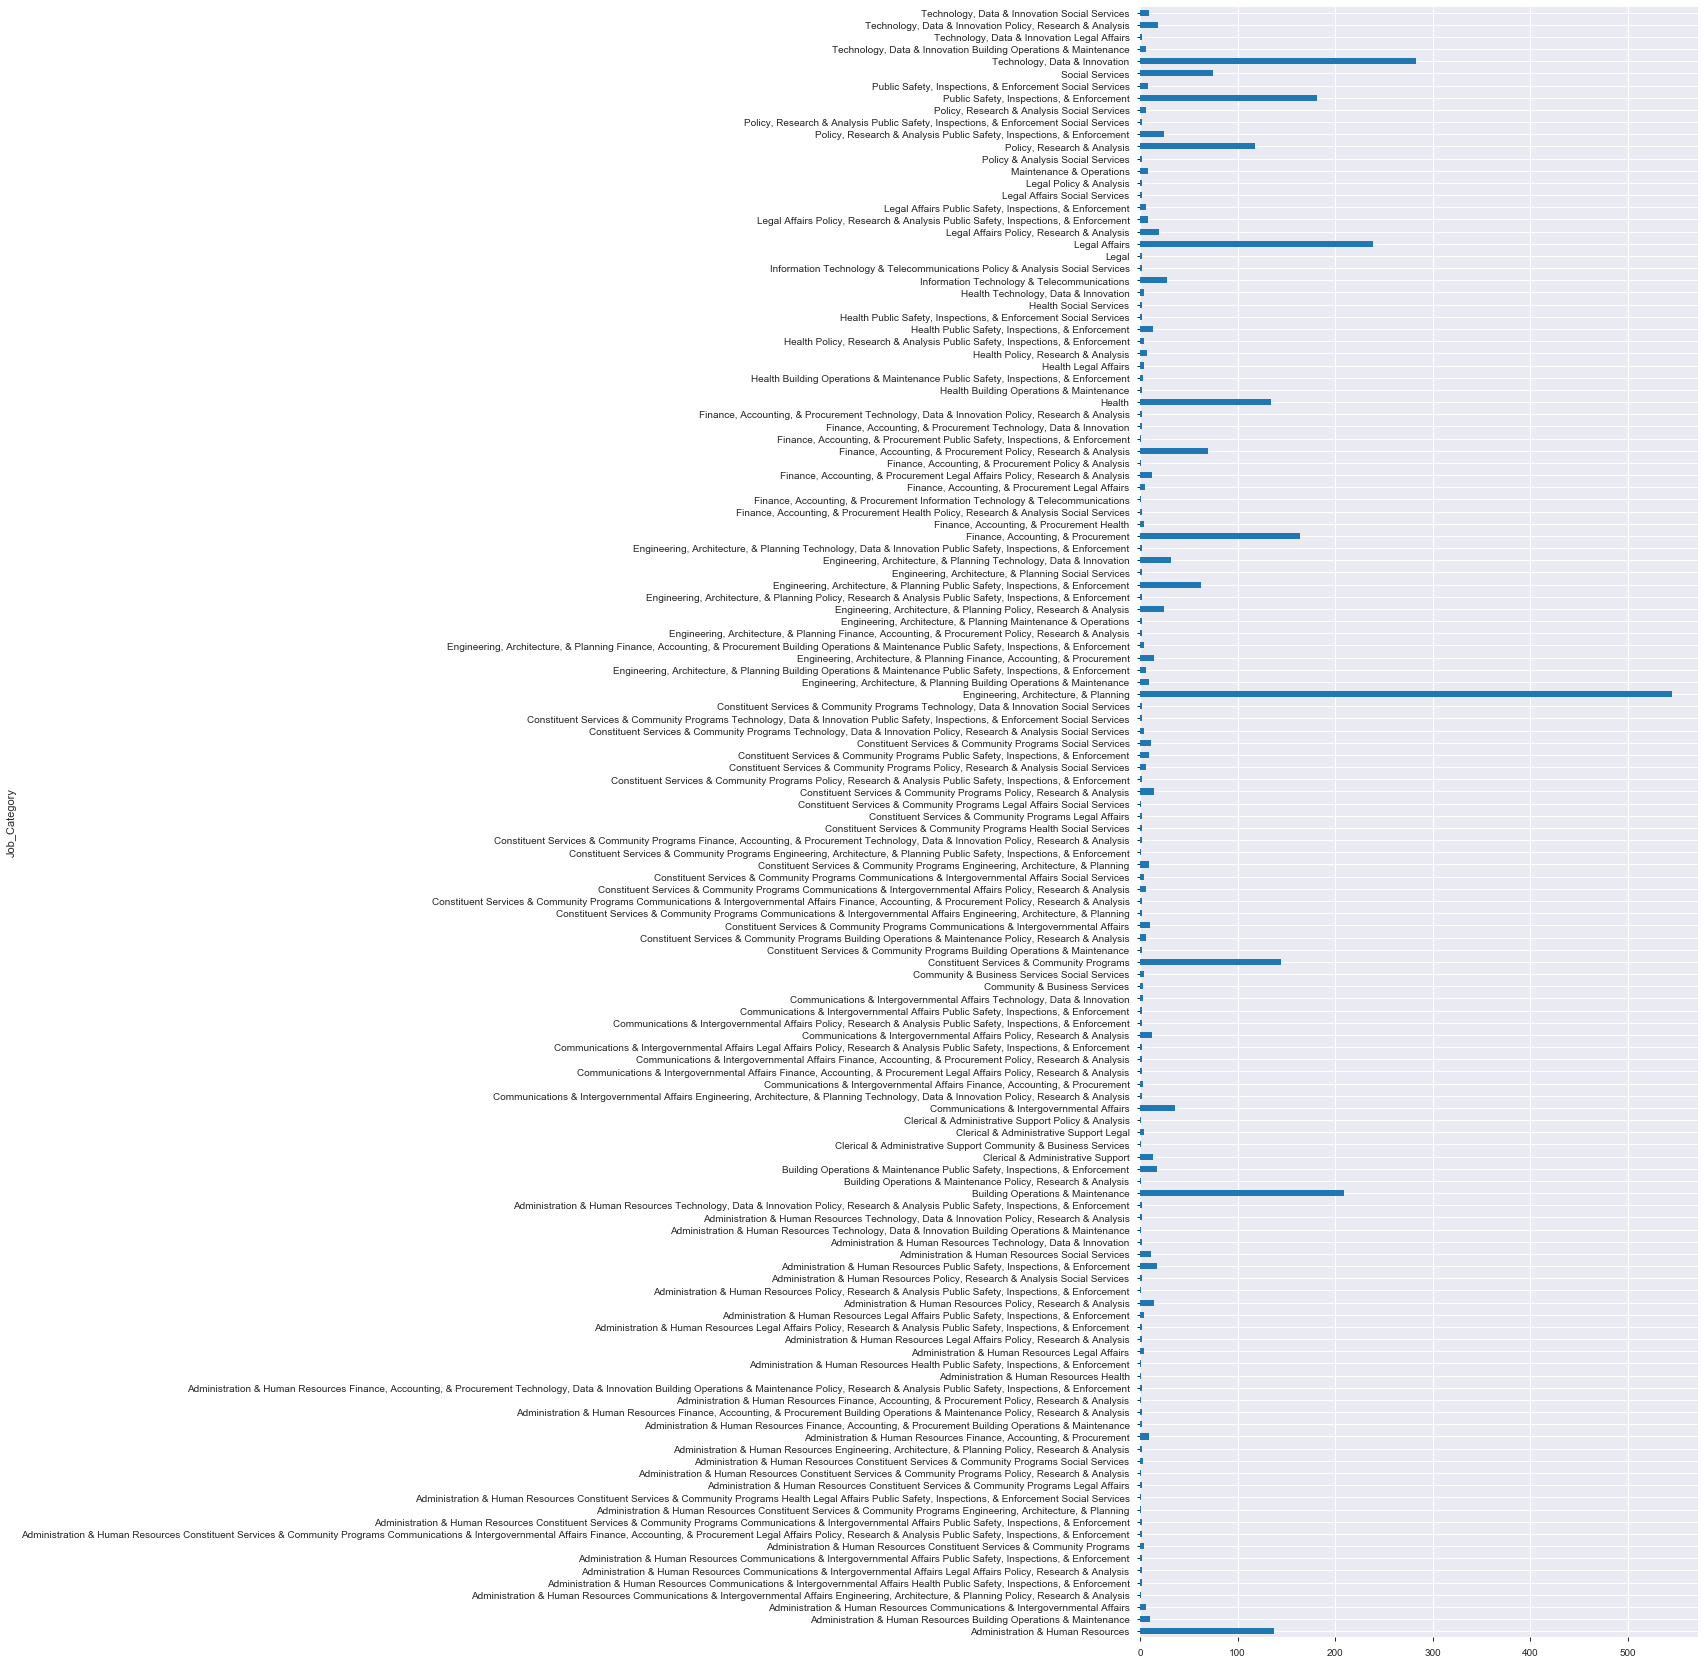

In [35]:
groups = jobpostingsdata_ny_df.groupby(jobpostingsdata_ny_df['Job_Category']).size()
plt.figure(figsize=(10, 30))
groups.plot.barh()

__Popular Job Categories__

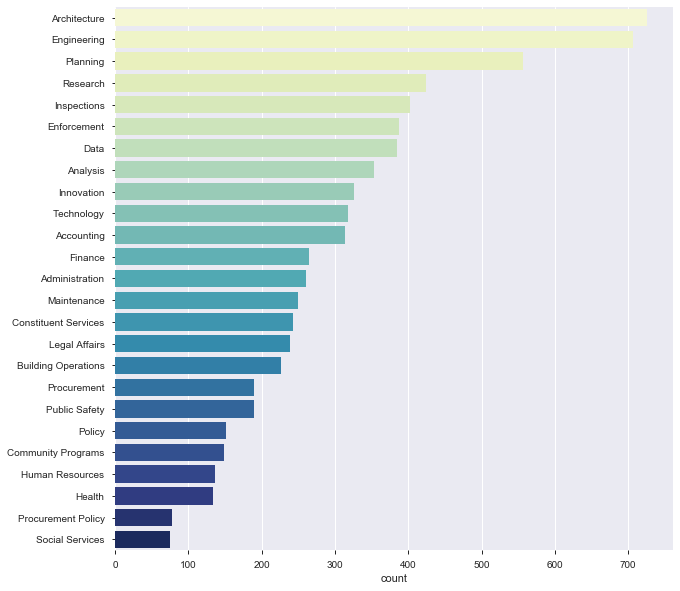

In [36]:

plt.figure(figsize=(10,10))
sb.countplot(y=key_categories, order = popular_categories.index, palette = 'YlGnBu')

##### Higest Paid Business Titles

In [37]:
salary_bussines_title = jobpostingsdata_ny_df.groupby(jobpostingsdata_ny_df.Business_Title)['Salary_Range_To'].mean()
salary_bussines_title

Business_Title
.Net Developer                                                                                   110000.000000
.Net Developer, Bureau of Application Development and Database Administration                    111000.000000
.Net Programmer / Analyst                                                                         89634.000000
311 Call Center Manager                                                                           70666.666667
311 Escalation Line Team Leader                                                                   49586.000000
A-Team Supervisor                                                                                 62834.000000
ACCOUNTABLE MANAGER                                                                              138445.300000
ACCOUNTS PAYABLE COORDINATOR                                                                      58404.000000
ADMINISTRATIVE ASSISTANT, LABOR SERVICES                                                         

### Identify the Niche Skill Set using clustering 


### Feature Selection

We are going to use the data satisfying the following conditions.

- Salary Range From > 0
- Salary Range To > 0
- Salary Frequency = Annual
- Full-Time/Part-Time indicator = F (full time) 
- Minimum Qual Requirements != NaN 
- Preferred Skills ! = NaN 

In [38]:
jobpostingsdata_ny_df = jobpostingsdata_ny_df.dropna(subset=['Salary_Range_From', 'Salary_Range_To', 
                        'Salary_Frequency','Full-Time/Part-Time_indicator', 'Minimum_Qual_Requirements', 
                        'Preferred_Skills']) 
jobpostingsdata_ny_df = jobpostingsdata_ny_df[(jobpostingsdata_ny_df['Salary_Frequency'] =='Annual') 
                                              & (jobpostingsdata_ny_df['Full-Time/Part-Time_indicator']  =='F') 
                                              & (jobpostingsdata_ny_df['Salary_Range_From'] > 0) 
                                              & (jobpostingsdata_ny_df['Salary_Range_To']  >0)]

jobpostingsdata_ny_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2203 entries, 2013-10-24 to 2019-11-25
Data columns (total 24 columns):
Job_ID                           2203 non-null int64
Agency                           2203 non-null object
Posting_Type                     2203 non-null object
#_Of_Positions                   2203 non-null int64
Business_Title                   2203 non-null object
Civil_Service_Title              2203 non-null object
Title_Code_No                    2203 non-null object
Level                            2203 non-null object
Job_Category                     2203 non-null object
Full-Time/Part-Time_indicator    2203 non-null object
Salary_Range_From                2203 non-null float64
Salary_Range_To                  2203 non-null float64
Salary_Frequency                 2203 non-null object
Work_Location                    2203 non-null object
Division/Work_Unit               2203 non-null object
Job_Description                  2203 non-null object
Minimum_Qua

__Plotting Starting Salary From with Years of experiance.__

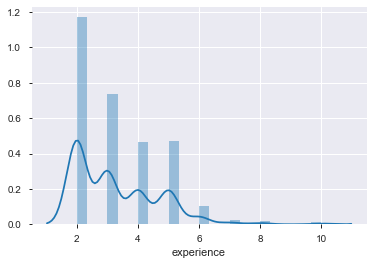

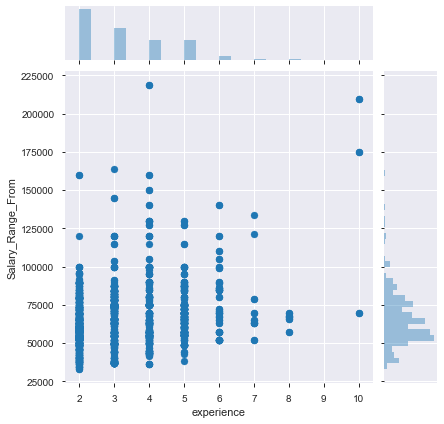

In [39]:
jobpostingsdata_ny_df['experience'] = jobpostingsdata_ny_df['Minimum_Qual_Requirements'].str.extract(r'(\w+)\syears.+experience')
years = {'two':2,
        'three':3,
        'four':4,
        'five':5,
        'six':6,
        'seven':7,
        'eight':8,
        'ten':10,        
        '2':2,
        '3':3,
        '4':4,
        '5':5,
        '10':10
}

jobpostingsdata_ny_df['experience'] = jobpostingsdata_ny_df['experience'].str.lower().map(years)
jobpostingsdata_ny_df['experience'].value_counts()

sb.distplot(jobpostingsdata_ny_df['experience'].dropna())

#Only the Starting Salary From with Years of experiance.
sb.jointplot(x='experience', y='Salary_Range_From', data=jobpostingsdata_ny_df[['experience','Salary_Range_From']])

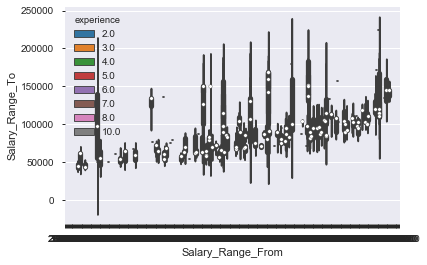

In [40]:
sb.violinplot(x='Salary_Range_From', y='Salary_Range_To', data = jobpostingsdata_ny_df, hue="experience")

#### 3D Visualization Experience, Salary Range From and Salary Range To

In [41]:
jobpostingsdata_ny_df = jobpostingsdata_ny_df.dropna(subset=['Salary_Range_From', 'Salary_Range_To', 'Salary_Frequency','Full-Time/Part-Time_indicator', 'Minimum_Qual_Requirements', 'Preferred_Skills']) 
jobpostingsdata_ny_df = jobpostingsdata_ny_df[(jobpostingsdata_ny_df['Salary_Frequency'] =='Annual') & (jobpostingsdata_ny_df['Full-Time/Part-Time_indicator']  =='F') & (jobpostingsdata_ny_df['Salary_Range_From'] > 0) & (jobpostingsdata_ny_df['Salary_Range_To']  >0)]

jobpostingsdata_ny_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2203 entries, 2013-10-24 to 2019-11-25
Data columns (total 25 columns):
Job_ID                           2203 non-null int64
Agency                           2203 non-null object
Posting_Type                     2203 non-null object
#_Of_Positions                   2203 non-null int64
Business_Title                   2203 non-null object
Civil_Service_Title              2203 non-null object
Title_Code_No                    2203 non-null object
Level                            2203 non-null object
Job_Category                     2203 non-null object
Full-Time/Part-Time_indicator    2203 non-null object
Salary_Range_From                2203 non-null float64
Salary_Range_To                  2203 non-null float64
Salary_Frequency                 2203 non-null object
Work_Location                    2203 non-null object
Division/Work_Unit               2203 non-null object
Job_Description                  2203 non-null object
Minimum_Qua

In [42]:
min75 = 74395
max75 = 108043

jobpostingsdata_ny_df.loc[  (jobpostingsdata_ny_df['Salary_Range_From'] > min75), 'Min_Salary75'] = 1
jobpostingsdata_ny_df.loc[~(jobpostingsdata_ny_df['Salary_Range_From'] > min75), 'Min_Salary75'] = 0

jobpostingsdata_ny_df.loc[ (jobpostingsdata_ny_df['Salary_Range_To'] > max75), 'Max_Salary75'] = 1
jobpostingsdata_ny_df.loc[~(jobpostingsdata_ny_df['Salary_Range_To'] > max75), 'Max_Salary75'] = 0

jobpostingsdata_ny_df['Min_Salary75'] = jobpostingsdata_ny_df['Min_Salary75'].astype(int)
jobpostingsdata_ny_df['Max_Salary75'] = jobpostingsdata_ny_df['Max_Salary75'].astype(int)

jobpostingsdata_ny_df.head()

,Job_ID,Agency,Posting_Type,#_Of_Positions,Business_Title,Civil_Service_Title,Title_Code_No,Level,Job_Category,Full-Time/Part-Time_indicator,...,Preferred_Skills,Hours/Shift,Work_Location_1,Recruitment_Contact,Residency_Requirement,Posting_Date,Post_Until,experience,Min_Salary75,Max_Salary75
Posting Date,,,,,,,,,,,,,,,,,,,,,
2013-10-24,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A High School Diploma or GED. 2. CDL Dri...,NaN,NaN,NaN,NYCHA has no residency requirements.,NaN,2013-12-12T00:00:00.000,3.0,0,0
2013-10-24,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A High School Diploma or GED. 2. CDL Dri...,NaN,NaN,NaN,NYCHA has no residency requirements.,NaN,2013-12-12T00:00:00.000,3.0,0,0
2013-12-09,137433,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,Contract Analyst,PROCUREMENT ANALYST,12158,3,"Finance, Accounting, & Procurement",F,...,Strong analytical background; advanced profic...,NaN,"42-09 28th Street, Long Island City, NY",NaN,New York City residency is generally required ...,NaN,2013-12-09T00:00:00.000,NaN,0,0
2013-12-20,138531,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Associate Chemist,ASSOCIATE CHEMIST,21822,2,"Health Public Safety, Inspections, & Enforcement",F,...,"In order to apply for this position, the candi...",35 Hours per week/Day shift,96-05 Horace Harding Expway,NaN,New York City residency is generally required ...,NaN,2014-07-25T00:00:00.000,2.0,0,0
2014-06-25,151131,NYC HOUSING AUTHORITY,External,1,Cost Estimating Manager,ADMINISTRATIVE STAFF ANALYST (,1002D,0,"Engineering, Architecture, & Planning",F,...,1. Five years of managerial and supervisory e...,NaN,NaN,NaN,NYCHA has no residency requirements.,NaN,2014-07-07T00:00:00.000,2.0,1,1


### Text Cleansing 


Here we conduct the following preprocessing for text for "Minimum Qual Requirements" and "Preferred Skills".

- Delete all characters except for alphabet and space.
- Change all characters into lower cases.

In [43]:
def clensing(df_series):
    jobpostingsdata_ny_df = df_series.replace('[^a-zA-Z ]',' ', regex = True)
    jobpostingsdata_ny_df = jobpostingsdata_ny_df.str.lower()
    return jobpostingsdata_ny_df

jobpostingsdata_ny_df['MinQualReq'] = clensing(jobpostingsdata_ny_df['Minimum_Qual_Requirements'])
jobpostingsdata_ny_df['PrefSkills']     = clensing(jobpostingsdata_ny_df['Preferred_Skills'])

In [44]:
jobpostingsdata_ny_df['PrefSkills'].head()

Posting Date
2013-10-24        a high school diploma or ged       cdl dri...
2013-10-24        a high school diploma or ged       cdl dri...
2013-12-09    strong analytical background   advanced profic...
2013-12-20    in order to apply for this position  the candi...
2014-06-25        five years of managerial and supervisory e...
Name: PrefSkills, dtype: object

__Calculate tf-idf and identify important words__

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [46]:
def calc_tfidf(docs, count, tfidf):
    bag = count.fit_transform(docs)
    t = tfidf.fit_transform(bag)
    return bag, t

def conc_text(texts, flags):
    pos = ""
    neg = ""
    for (t,f) in zip(texts.values, flags.values):
        if f >0:
            pos = pos + t + " "
        else:
            neg = neg + t + " "
    
    return [pos,neg]

tfidf = TfidfTransformer(use_idf = True, norm ='l2', smooth_idf = True)
count = CountVectorizer()

docs1 = conc_text(jobpostingsdata_ny_df['MinQualReq'], jobpostingsdata_ny_df['Min_Salary75'])
bag1, tfidf1 = calc_tfidf(docs1, count, tfidf)

In [47]:
bag1.shape

(2, 1651)

In [48]:
print(tfidf1.toarray())

[[2.64083542e-04 5.28167084e-04 7.92250625e-04 ... 1.62531437e-02
  9.39488075e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.58362899e-03
  5.30907998e-04 9.79351625e-04]]


In [49]:
def stats(count, tfidf):
    df1 = pd.DataFrame(list(count.vocabulary_.items()),columns=['word','id'])
    df1 = df1.sort_values('id').reset_index()
    dfx = pd.DataFrame(tfidf.toarray().T)
    dfx.columns = ['tf-idf for high salary', 'tf-idf for low salary']
    df1 = pd.concat([df1, dfx], axis=1)
    df1['diff'] = df1['tf-idf for high salary']- df1['tf-idf for low salary']
    return df1

df1 = stats(count,tfidf1)

In [50]:
df1.head()

,index,word,id,tf-idf for high salary,tf-idf for low salary,diff
0,878,aa,0,0.000264,0.0,0.000264
1,916,aba,1,0.000528,0.0,0.000528
2,554,abandoned,2,0.000792,0.0,0.000792
3,547,abandonment,3,0.000792,0.0,0.000792
4,470,abilities,4,0.000132,0.0,0.000132


In [51]:
df1.nlargest(20,'diff')

,index,word,id,tf-idf for high salary,tf-idf for low salary,diff
1190,204,project,1190,0.075159,0.020374,0.054785
79,36,and,79,0.242670,0.208580,0.034089
119,95,as,119,0.132656,0.101536,0.031120
212,162,by,212,0.077132,0.047749,0.029383
643,128,for,643,0.133971,0.107608,0.026363
1037,184,on,1037,0.044720,0.020274,0.024446
305,208,complex,305,0.028560,0.004380,0.024180
911,206,major,911,0.028373,0.004280,0.024092
346,207,contributor,346,0.025178,0.001195,0.023984
864,205,leader,864,0.025178,0.001195,0.023984


In [52]:
docs2 = conc_text(jobpostingsdata_ny_df['MinQualReq'], jobpostingsdata_ny_df['Max_Salary75'])
bag2, tfidf2 = calc_tfidf(docs2, count, tfidf)
df2 = stats(count, tfidf2)
df2.nlargest(20,'diff')

,index,word,id,tf-idf for high salary,tf-idf for low salary,diff
1028,39,of,1028,0.472548,0.416133,0.056415
921,80,managerial,921,0.064617,0.012812,0.051805
220,83,capacity,220,0.053072,0.017735,0.035337
584,79,executive,584,0.044928,0.009643,0.035285
1644,38,years,1644,0.150983,0.117098,0.033884
980,74,months,980,0.058263,0.025827,0.032436
702,77,have,702,0.109456,0.077616,0.031840
989,76,must,989,0.125744,0.095587,0.030157
172,78,been,172,0.044570,0.014498,0.030072
39,81,administrative,39,0.058979,0.030649,0.028330


In [53]:
docs3 = conc_text(jobpostingsdata_ny_df['PrefSkills'], jobpostingsdata_ny_df['Min_Salary75'])
bag3, tfidf3 = calc_tfidf(docs3, count, tfidf)
df3 = stats(count, tfidf3)
df3.nlargest(20,'diff')

,index,word,id,tf-idf for high salary,tf-idf for low salary,diff
1656,6,experience,1656,0.232238,0.173087,0.059150
2952,2,of,2952,0.290297,0.257998,0.032299
4030,567,sql,4030,0.027798,0.006241,0.021557
4710,16,with,4710,0.191068,0.171346,0.019723
4767,1,years,4767,0.057532,0.039843,0.017689
1210,345,design,1210,0.042401,0.026199,0.016202
1240,576,development,1240,0.033604,0.017853,0.015751
221,4,and,221,0.726623,0.711146,0.015476
3835,76,security,3835,0.018473,0.005225,0.013248
1513,1095,energy,1513,0.023400,0.010378,0.013022


### Preferred skills for jobs with high maximum salary.

In [54]:
docs4 = conc_text(jobpostingsdata_ny_df['PrefSkills'], jobpostingsdata_ny_df['Max_Salary75'])
bag4, tfidf4 = calc_tfidf(docs4, count, tfidf)
df4 = stats(count, tfidf4)
df4.nlargest(20,'diff')

,index,word,id,tf-idf for high salary,tf-idf for low salary,diff
1656,6,experience,1656,0.231227,0.173467,0.057761
2952,2,of,2952,0.304358,0.252091,0.052267
2581,178,management,2581,0.094681,0.059439,0.035242
4767,1,years,4767,0.069598,0.034896,0.034702
3399,233,project,3399,0.057056,0.029756,0.027300
941,465,construction,941,0.044514,0.019330,0.025184
4273,141,technical,4273,0.034622,0.018172,0.016450
1210,333,design,1210,0.041335,0.026643,0.014692
1240,162,development,1240,0.031619,0.018679,0.012941
2586,140,managing,2586,0.025083,0.012887,0.012197


### Popular Job Titles

##### Annual Salary range

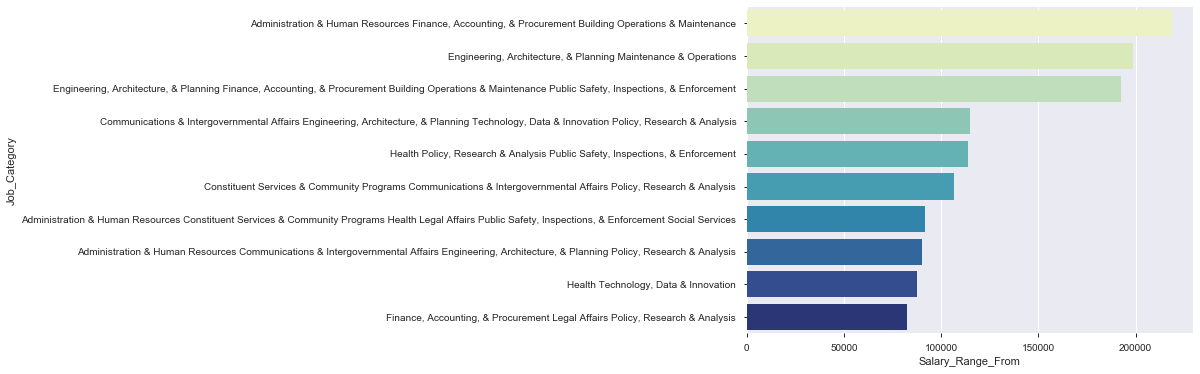

In [55]:
salary_table = jobpostingsdata_ny_df[['Job_Category', 'Salary_Range_From', 'Salary_Range_To']]
jobs_with_salary_highest_low_range = pd.DataFrame(salary_table.groupby(['Job_Category'])['Salary_Range_From'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sb.barplot(y='Job_Category', x = 'Salary_Range_From', data = jobs_with_salary_highest_low_range, palette='YlGnBu')

##### Popular preferred skills per job category

In [56]:
popular_categories = jobpostingsdata_ny_df.Job_Category.value_counts()[:5]
popular_categories

Engineering, Architecture, & Planning        444
Technology, Data & Innovation                213
Legal Affairs                                176
Public Safety, Inspections, & Enforcement    138
Finance, Accounting, & Procurement           126
Name: Job_Category, dtype: int64

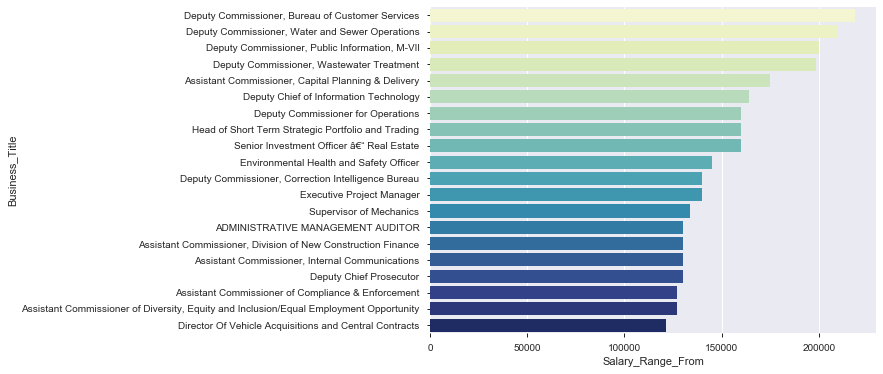

In [57]:
bt_highest_high_range_hourly = jobpostingsdata_ny_df.groupby('Business_Title')['Salary_Range_From'].mean().nlargest(20).reset_index()
plt.figure(figsize=(8, 6))
sb.barplot(y='Business_Title', x='Salary_Range_From', data=bt_highest_high_range_hourly, palette='YlGnBu')

### Pair Plots

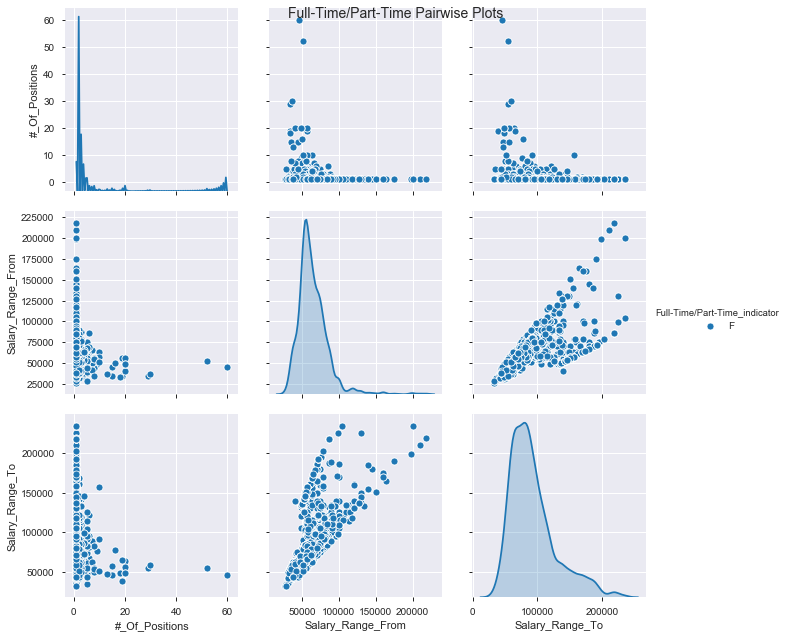

In [58]:
#PairWise Plot
cols = ['#_Of_Positions', 
        'Salary_Range_From', 
        'Salary_Range_To',
        'Full-Time/Part-Time_indicator']
        
pp = sb.pairplot(data=jobpostingsdata_ny_df[cols], 
                  hue='Full-Time/Part-Time_indicator',
                  height=3 
                 )

fig = pp.fig 
fig.suptitle('Full-Time/Part-Time Pairwise Plots', fontsize=14)
plt.show()

### Plotting Histograms

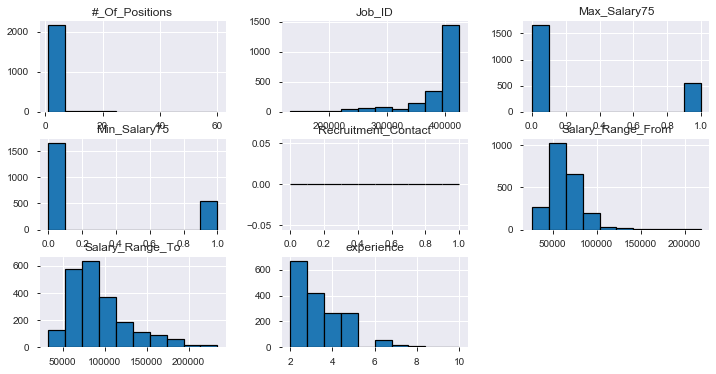

In [59]:
jobpostingsdata_ny_df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### Agency rates according in agency data (highest 7 values) 

In [60]:
agency = pd.DataFrame(jobpostingsdata_ny_df.groupby(by='Agency')['#_Of_Positions'].sum().sort_values(ascending=False).head(10))
agency=agency.reset_index()

agency

,Agency,#_Of_Positions
0,DEPT OF ENVIRONMENT PROTECTION,618
1,NYC HOUSING AUTHORITY,436
2,DEPARTMENT OF TRANSPORTATION,286
3,DEPT OF DESIGN & CONSTRUCTION,248
4,TAXI & LIMOUSINE COMMISSION,244
5,ADMIN FOR CHILDREN'S SVCS,206
6,DEPT OF HEALTH/MENTAL HYGIENE,180
7,DEPARTMENT OF CORRECTION,142
8,DEPT OF PARKS & RECREATION,128
9,LAW DEPARTMENT,126


Text(0.5, 1.0, 'Agency rates according in agency data')

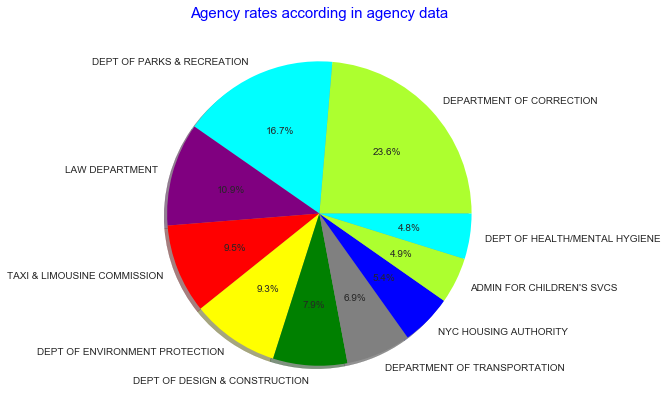

In [61]:

labels = agency.Agency.value_counts().index
colors = ['greenyellow','cyan','purple', 'red','yellow','green','grey','blue']
explode = [0,0,0,0,0,0,0,0,0,0]
sizes = agency['#_Of_Positions']

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True)
plt.title('Agency rates according in agency data',color = 'blue',fontsize = 15)

In [62]:
jobpostingsdata_ny_df['#_Of_Positions']

Posting Date
2013-10-24    52
2013-10-24    52
2013-12-09     1
2013-12-20     1
2014-06-25     1
2014-06-26     1
2014-08-21     1
2014-11-19     1
2014-11-19     1
2014-10-08     1
2014-10-21     1
2014-11-18     1
2015-02-12     1
2015-02-20     1
2015-03-16     3
2015-04-15     3
2015-04-15     3
2015-03-30     1
2015-03-30     1
2015-05-18     1
2015-05-11     1
2015-05-11     1
2015-05-11     1
2015-05-29     2
2015-05-29     2
2015-07-22     4
2015-06-23     1
2015-06-23     1
2015-07-10     1
2015-09-02     1
              ..
2019-11-25     1
2019-11-25     1
2019-11-25     1
2019-11-25     1
2019-11-22     2
2019-11-25     1
2019-11-22    10
2019-11-22    10
2019-11-22     1
2019-11-22     1
2019-11-22     4
2019-11-22     4
2019-11-22     1
2019-11-22     1
2019-11-25     1
2019-11-22     1
2019-11-22     1
2019-11-25     2
2019-11-22     1
2019-11-22     1
2019-11-25     1
2019-11-25     1
2019-11-25     1
2019-11-25     1
2019-11-25     1
2019-11-25     1
2019-11-25     1
2